# Random Walk with TD
In this example we will basically find a path from S(start) - A - B - C - F - E(end)

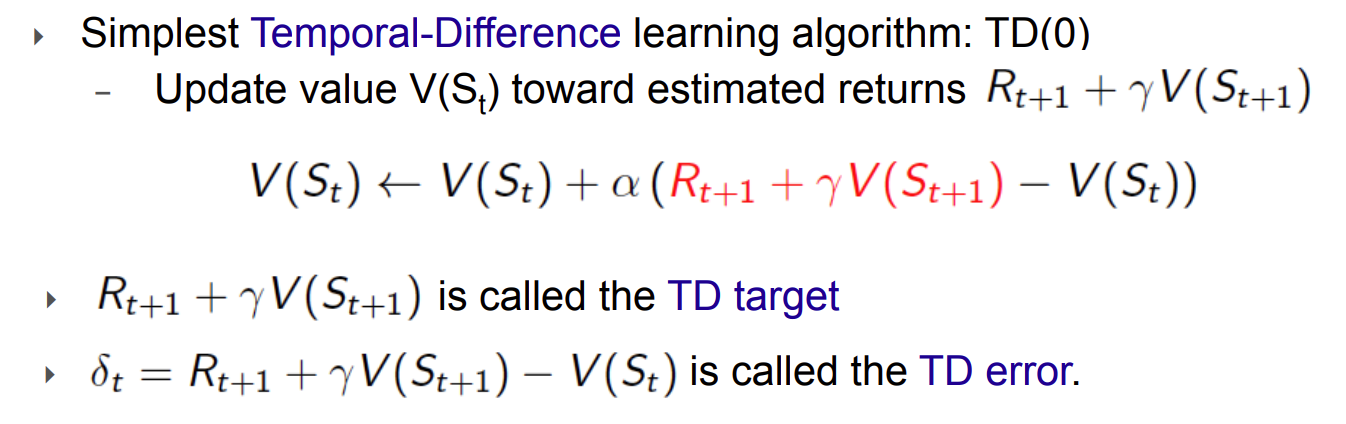

https://www.cs.cmu.edu/~rsalakhu/10703/Lectures/Lecture_TD.pdf
https://math.stackexchange.com/questions/1884168/implementing-temporal-difference-learning-for-a-random-walk-in-python

In [158]:
import numpy as np

# Parameters
ALPHA = 0.1
GAMMA = 1.0
EPISODES = 5000
positions_count = 7
positions_map = {'S':0, 'A':1, 'B':2, 'C':3, 'D':4, 'F':5, 'E':6}
# Initialize state values
values = np.ones(positions_count)*0.5

In [167]:
# Learning
np.set_printoptions(precision=3, suppress=True)
for episode in range(EPISODES):
    position = 0 # Start state
    
    while position != positions_count - 1:
        # Choose action: move right (1) or left (-1), 
        # but can't move left from the start state
        action = 1 if position == positions_map['S'] or np.random.rand() < 0.5 else -1
        
        next_position = position + action

        # Compute reward: +1 at the end state, 0 elsewhere
        next_reward = 1.0 if next_position == positions_map['E'] else 0.0

        # Temporal Difference update
        if next_position == positions_map['E'] or next_position == positions_map['S']:
            values[position] = values[position] + ALPHA * (next_reward - values[position])
        else:
            values[position] = values[position] + ALPHA * (next_reward + GAMMA * values[next_position] - values[position])

        position = next_position
print("Estimated state values:", values[1:-1])

Estimated state values: [0.237 0.47  0.581 0.758 0.9  ]
